## Observations and Insights 

In [265]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()
# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_merge_df.head(20)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1  
5            33.464577                 1  
6            31.099498                 1  
7            26.546993                 1  
8            24.365505                 1  
9            22.050126                 1  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  
15           33.949940                 0  
16           32.959671                 1  
17           28.328531                 1  
18           25.472143                 1  
19           23.343598                 1

In [110]:
# Checking the number of mice.
mouse_count = mouse_merge_df["Mouse ID"].count()
mouse_count


1893

In [126]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

x = mouse_merge_df.columns
x                         
                                    

# Me" create a new list of duplicate IDs and Timepoint values




mouse_merge_dupfree_df = mouse_merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='last')
                         #cleaned_df=df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

mouse_merge_dupfree_df.head(20)
#print(len(mouse_merge_dupfree_df ))

        






Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1  
5            33.464577                 1  
6            31.099498                 1  
7            26.546993                 1  
8            24.365505                 1  
9            22.050126                 1  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  
15           33.949940                 0  
16           32.959671                 1  
17           28.328531                 1  
18           25.472143                 1  
19           23.343598                 1

In [171]:
#get tumor vol stats
mouse_grp_drug_df = mouse_merge_dupfree_df.groupby(["Drug Regimen"])
tumor_vol_mean = mouse_grp_drug_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = mouse_grp_drug_df["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_grp_drug_df["Tumor Volume (mm3)"].var()
tumor_vol_std = mouse_grp_drug_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = mouse_grp_drug_df["Tumor Volume (mm3)"].sem()
print(tumor_vol_std)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64


In [165]:




#get tumor volume
mouse_grp_df = mouse_merge_dupfree_df.groupby(["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"])

#get just drug, timepoint, and tumor volumn data
#tumor_vol_df = mouse_merge_dupfree_df.loc[:, ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)" ]].head(50)
  
#mouse_grp_df = mouse_grp_df.loc[:, ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)" ]].head(50)
    
#get tumor volume average
ave_tumor_vol_df = mouse_grp_df.mean()


ave_tumor_vol_df= ave_tumor_vol_df.reset_index()

ave_tumor_vol_df.head(50)

tumor_vol_SEM_df = mouse_grp_df.sem()
tumor_vol_SEM_df = pd.DataFrame(tumor_vol_SEM_df).reset_index()
tumor_vol_SEM_df.head(50)


Drug Regimen  Timepoint  Tumor Volume (mm3)  Age_months  Metastatic Sites  \
0     Capomulin          0           45.000000    1.570011               0.0   
1     Capomulin          5           38.796474         NaN               NaN   
2     Capomulin          5           39.202129         NaN               NaN   
3     Capomulin          5           41.019913         NaN               NaN   
4     Capomulin          5           41.408591         NaN               NaN   
5     Capomulin          5           41.534097         NaN               NaN   
6     Capomulin          5           42.261665         NaN               NaN   
7     Capomulin          5           43.180977         NaN               NaN   
8     Capomulin          5           43.878496         NaN               NaN   
9     Capomulin          5           44.022752         NaN               NaN   
10    Capomulin          5           45.462243         NaN               NaN   
11    Capomulin          5           45.473753         NaN               NaN   
12    Capomulin          5           45.595685         NaN               NaN   
13    Capomulin          5           45.597064         NaN               NaN   
14    Capomulin          5           45.622381         NaN               NaN   
15    Capomulin          5           45.641438         NaN               NaN   
16    Capomulin          5           45.651331         NaN               NaN   
17    Capomulin          5           45.704434         NaN               NaN   
18    Capomulin          5           45.737145         NaN               NaN   
19    Capomulin          5           45.760886         NaN               NaN   
20    Capomulin          5           45.781746         NaN               NaN   
21    Capomulin          5           45.838998         NaN               NaN   
22    Capomulin          5           45.839400         NaN               NaN   
23    Capomulin          5           45.851193         NaN               NaN   
24    Capomulin          5           45.893720         NaN               NaN   
25    Capomulin          5           45.895647         NaN               NaN   
26    Capomulin         10           35.624403         NaN               NaN   
27    Capomulin         10           36.825367         NaN               NaN   
28    Capomulin         10           37.614948         NaN               NaN   
29    Capomulin         10           39.005494         NaN               NaN   
30    Capomulin         10           39.113891         NaN               NaN   
31    Capomulin         10           39.848223         NaN               NaN   
32    Capomulin         10           39.952347         NaN               NaN   
33    Capomulin         10           41.630010         NaN               NaN   
34    Capomulin         10           41.999228         NaN               NaN   
35    Capomulin         10           42.992077         NaN               NaN   
36    Capomulin         10           43.231963         NaN               NaN   
37    Capomulin         10           43.270852         NaN               NaN   
38    Capomulin         10           43.421014         NaN               NaN   
39    Capomulin         10           43.688026         NaN               NaN   
40    Capomulin         10           44.502042         NaN               NaN   
41    Capomulin         10           46.059608         NaN               NaN   
42    Capomulin         10           46.154737         NaN               NaN   
43    Capomulin         10           46.304003         NaN               NaN   
44    Capomulin         10           46.408361         NaN               NaN   
45    Capomulin         10           46.414518         NaN               NaN   
46    Capomulin         10           46.425366         NaN               NaN   
47    Capomulin         10           46.544292         NaN               NaN   
48    Capomulin         10           46.568417         NaN               NaN   
49 

In [112]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_merge_by_ID_df = mouse_merge_df.groupby(['Mouse ID'])

mouse_merge_by_ID_df.head(20)


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_merge_df = mouse_merge_dupfree_df.drop_duplicates(subset=["Mouse ID"], keep='last')
clean_mouse_merge_df.head(10)

unique_mouse_df = clean_mouse_merge_df["Mouse ID"].unique()
unique_mouse_df

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [125]:
unique_mice = clean_mouse_merge_df.drop_duplicates(subset=['Mouse ID', 'Drug Regimen']).copy()
len(unique_mice) #249 unique mice within all Drug Regimens
unique_mice.head()



Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9      k403     Ramicane    Male          21          16         45   
19     s185    Capomulin  Female           3          17         45   
29     x401    Capomulin  Female          16          15         45   
39     m601    Capomulin    Male          22          17         45   
49     g791     Ramicane    Male          11          16         45   

    Tumor Volume (mm3)  Metastatic Sites  
9            22.050126                 1  
19           23.343598                 1  
29           28.484033                 0  
39           28.430964                 1  
49           29.128472                 1

In [200]:
#grp=unique_mice.groupby(['Drug Regimen']).count()
grp=unique_mice.groupby(['Drug Regimen', 'Sex']).count()
print(grp)


                     Mouse ID  Age_months  Weight (g)  Timepoint  \
Drug Regimen Sex                                                   
Capomulin    Female        13          13          13         13   
             Male          12          12          12         12   
Ceftamin     Female        13          13          13         13   
             Male          12          12          12         12   
Infubinol    Female        12          12          12         12   
             Male          13          13          13         13   
Ketapril     Female         9           9           9          9   
             Male          16          16          16         16   
Naftisol     Female        13          13          13         13   
             Male          12          12          12         12   
Placebo      Female        13          13          13         13   
             Male          12          12          12         12   
Propriva     Female        12          12       

In [116]:
# Checking the number of mice in the clean DataFrame.
unique_mice.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of 
#each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the #tumor volume. 
# Assemble the resulting series into a single summary dataframe.

                       #****get tumor vol stats*****

#group duplicate free merge by drug type
mouse_grp_drug_df = mouse_merge_dupfree_df.groupby(["Drug Regimen"])

#calculate the various stats for tumor volume
tumor_vol_mean = mouse_grp_drug_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = mouse_grp_drug_df["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_grp_drug_df["Tumor Volume (mm3)"].var()
tumor_vol_std = mouse_grp_drug_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = mouse_grp_drug_df["Tumor Volume (mm3)"].sem()


#add stats to a new dataframe

tumor_vol_stats_df = pd.DataFrame({'Tumor Vol Mean': tumor_vol_mean, 'Tumor Vol Median': tumor_vol_median,
                                  'Tumor Vol Variance': tumor_vol_var, 'Tumor Vol Std': tumor_vol_std,
                                   'Tumor Vol SEM': tumor_vol_sem})

#print summary dataframe
tumor_vol_stats_df



Tumor Vol Mean  Tumor Vol Median  Tumor Vol Variance  \
Drug Regimen                                                         
Capomulin          40.675741         41.557809           24.947764   
Ceftamin           52.591172         51.776157           39.290177   
Infubinol          52.884795         51.820584           43.128684   
Ketapril           55.235638         53.698743           68.553577   
Naftisol           54.331565         52.509285           66.173479   
Placebo            54.033581         52.288934           61.168083   
Propriva           52.382993         50.783528           43.220205   
Ramicane           40.216745         40.673236           23.486704   
Stelasyn           54.233149         52.431737           59.450562   
Zoniferol          53.236507         51.818479           48.533355   

              Tumor Vol Std  Tumor Vol SEM  
Drug Regimen                                
Capomulin          4.994774       0.329346  
Ceftamin           6.268188       0.469821  
Infubinol          6.567243       0.492236  
Ketapril           8.279709       0.603860  
Naftisol           8.134708       0.596466  
Placebo            7.821003       0.581331  
Propriva           6.574208       0.526358  
Ramicane           4.846308       0.320955  
Stelasyn           7.710419       0.573111  
Zoniferol          6.966589       0.516398

In [195]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_grp_drug_by_tumor_vol_df= mouse_grp_drug_df["Tumor Volume (mm3)"]

# Using the aggregation method, produce the same summary statistics in a single line

#this is a time saver
tumor_vol_stats_agg_df = mouse_grp_drug_by_tumor_vol_df.aggregate(['mean', 'median', 'var', 'std', 'sem'])

tumor_vol_stats_agg_df


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mice Per Drug Regimen')

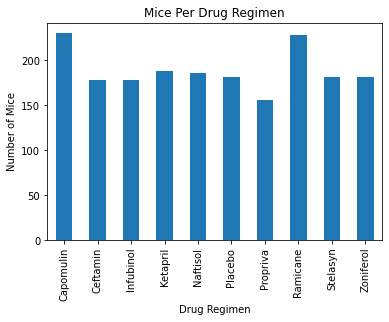

In [230]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimen_count = mouse_grp_drug_df['Mouse ID'].count()
drug_regimen_count.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.title("Mice Per Drug Regimen")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

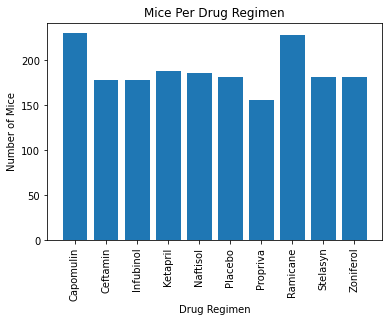

In [269]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#get drug names from drug_regimen_count
#drug_regimen_list = drug_regimen_count.index.to_list
drug_regimen_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


# this didn't work for the list creation.   
#drug_regimen_list =  drug_regimen_count[drug_regimen_count['Drug Regimen'] =='Capomulin'.index.tolist()
                                     
# plot chart
plt.bar(drug_regimen_list, drug_regimen_count)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice Per Drug Regimen")
plt.xticks(rotation ='vertical')





Text(0, 0.5, 'Gender Distribution')

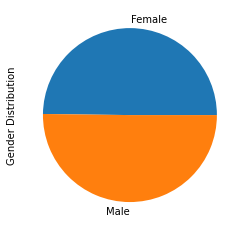

In [276]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#group mouse dup free data by gender
mouse_merge_dupfree_by_gender_df = mouse_merge_dupfree_df.groupby(["Sex"])

#break out mice by gender
gender_totals = mouse_merge_dupfree_by_gender_df['Mouse ID'].unique()


#plot pie chart
gender_map = gender_totals.map(len)
gender_pie = gender_map.plot.pie(y='Sex')
plt.ylabel('Gender Distribution')






In [289]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# plt.pie(gender_map, labels=["Female","Male"])
# plt.ylabel('Gender Distribution')

print(gender_totals.count)


plt.pie(GT, explode=False, labels=["Female","Male"], colors=["yellow","green"],
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()


AttributeError: 'function' object has no attribute 'unique'

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
